In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings #importing this to supress Warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking shape of the dataframe
housing_data.shape


(1460, 81)

In [5]:
#Checking  columns 
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
nuni = housing_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [9]:
#Drop columns with maximum missing values

#housing_data = housing_data.drop('PoolQC')
housing_data = housing_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])


In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
housing_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [12]:
housing_data.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [13]:
#check Missing values of columns
housing_data.isnull().sum()[housing_data.isnull().sum()>0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [14]:
#Droping Alley column since more of it's data is missing more then 90%
housing_data=housing_data.drop(columns=['Alley'])

In [15]:
#replace Nan values of FireplaceQu with NA that means no FireplaceQu
housing_data.FireplaceQu = housing_data.FireplaceQu.fillna('NA')

In [16]:
#checking missing value again after making these adjustments
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [17]:
housing_data.LotFrontage.value_counts()


LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [18]:
#fetching median of LotFrontage
LotFrontage_median = housing_data.LotFrontage.median()
LotFrontage_median

69.0

In [19]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
housing_data.LotFrontage = housing_data.LotFrontage.fillna(LotFrontage_median)

In [20]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
housing_data.MasVnrArea = housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.median())  

In [21]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
housing_data.MasVnrType = housing_data.MasVnrType.fillna('None')

In [22]:
#replace Nan values of BsmtQual with NA i.e. No Basement
housing_data.BsmtQual = housing_data.BsmtQual.fillna('NA')

In [23]:
#replace Nan values of BsmtCond with NA i.e. No Basement
housing_data.BsmtCond = housing_data.BsmtCond.fillna('NA')

In [24]:
housing_data.BsmtExposure = housing_data.BsmtExposure.fillna('No')

In [25]:
housing_data.BsmtFinType1 = housing_data.BsmtFinType1.fillna('NA')

In [26]:
housing_data.BsmtFinType2 = housing_data.BsmtFinType2.fillna('NA')

In [27]:
housing_data.GarageType = housing_data.GarageType.fillna('NA')

In [28]:
housing_data.Electrical = housing_data.Electrical.fillna(housing_data.Electrical.mode()[0]) 

In [29]:
housing_data.GarageFinish = housing_data.GarageFinish.fillna('NA')

In [30]:
housing_data.GarageYrBlt = housing_data.GarageYrBlt.fillna(0)

In [31]:
housing_data.GarageFinish = housing_data.GarageFinish.fillna('NA')

In [32]:
housing_data.GarageQual = housing_data.GarageQual.fillna('NA')

In [33]:
housing_data.GarageQual = housing_data.GarageQual.fillna('NA')

In [34]:
housing_data.GarageCond = housing_data.GarageCond.fillna('NA')

In [35]:
#checking missing value after setting NA
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

Series([], dtype: int64)

In [36]:
housing_data['HouseAge'] = housing_data.YrSold - housing_data.YearBuilt

In [37]:
housing_data=housing_data.drop(columns=['YrSold', 'YearBuilt'])

In [38]:
convert_dict = {'MSSubClass':object}
housing_data = housing_data.astype(convert_dict)

In [39]:
housing_data = housing_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [40]:
housing_data = housing_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [41]:
housing_data = housing_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [42]:
housing_data = housing_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [43]:
housing_data = housing_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
housing_data = housing_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [45]:
housing_data = housing_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [46]:
housing_data.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [47]:

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

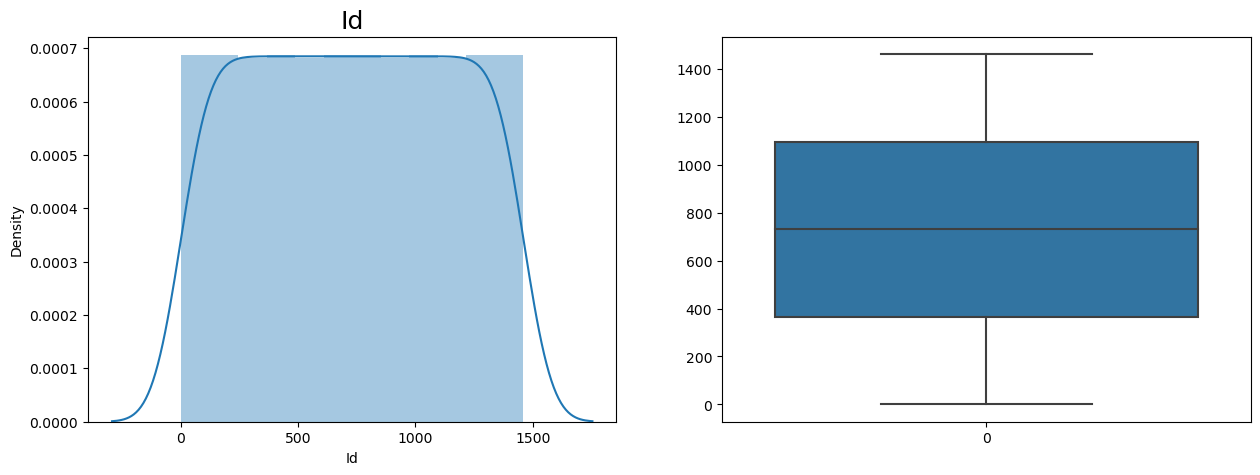

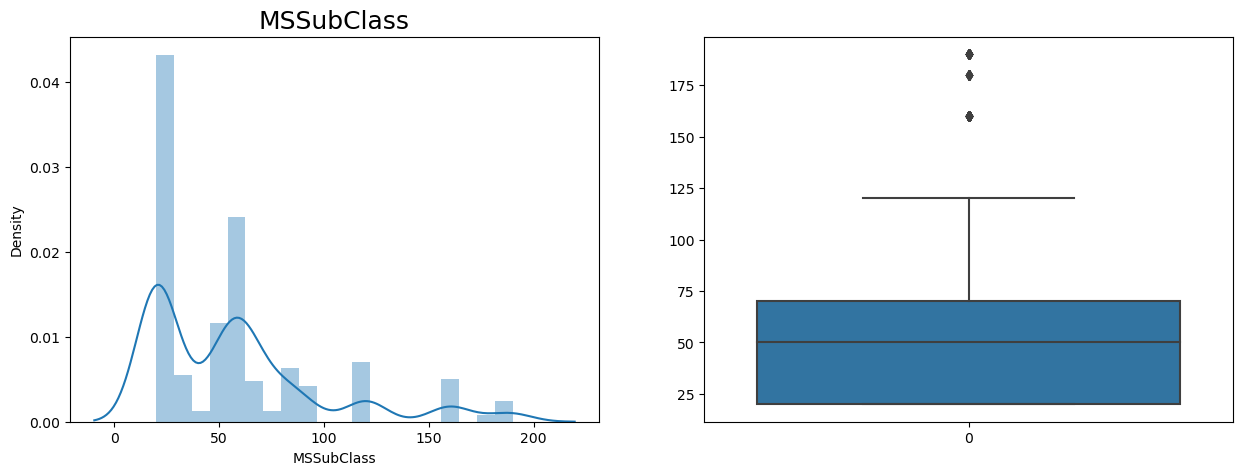

ValueError: could not convert string to float: 'RL'

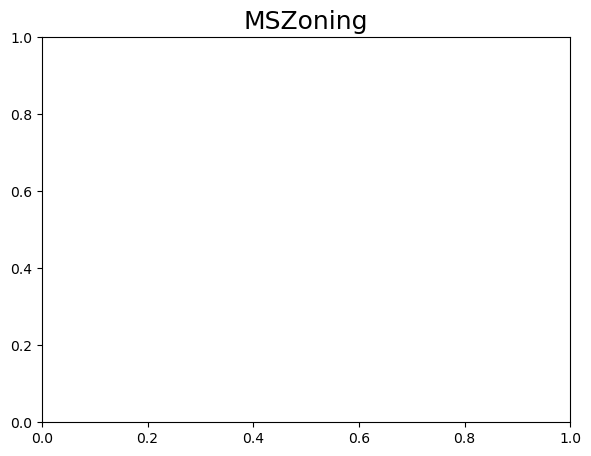

In [48]:

for c in housing_data.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(c, fontdict={'fontsize': 18})
    sns.distplot(housing_data[c])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_data[c])
    plt.show()
    


In [ ]:
housing_data.columns

In [ ]:
for c in housing_data.columns:
    if housing_data[c].dtype == object :
        print(c)
        print(housing_data[c].value_counts(normalize=True))

In [49]:
#Droping the columns having morethen 80% bias data
housing_data=housing_data.drop(columns=['Id', 'LandContour','Street', 'Utilities', 'Condition2', 'LandSlope', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'Electrical', 'CentralAir', 'BsmtFinType2', 'GarageQual', 'Functional', 'GarageCond'
                                    , 'SaleCondition', 'SaleType', 'Condition1', 'BldgType', 'ExterCond'
                                    , 'PavedDrive'])

In [50]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [51]:
#Get all object type columns
object_columns = []
for col in housing_data.columns:
    if housing_data[col].dtype == object:
        object_columns.append(col)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### creating Dummy values

In [52]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(housing_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
housing_data = pd.concat([housing_data,MSSubClass_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [53]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(housing_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [54]:
#concat MSZoning_df with main house_data df
housing_data = pd.concat([housing_data,MSZoning_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [55]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(housing_data['LotShape'],drop_first=True, prefix='LotShape')

In [56]:
#concat LotShape_df with main house_data df
housing_data = pd.concat([housing_data,LotShape_df],axis=1)
housing_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [57]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(housing_data['LotConfig'],drop_first=True, prefix='LotConfig')


In [58]:
#concat LotConfig_df with main house_data df
housing_data = pd.concat([housing_data,LotConfig_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [59]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(housing_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
housing_data = pd.concat([housing_data,Neighborhood_df],axis=1)
housing_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [60]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(housing_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
housing_data = pd.concat([housing_data,HouseStyle_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False

In [61]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(housing_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
housing_data = pd.concat([housing_data,RoofStyle_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PCon

In [62]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(housing_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
housing_data = pd.concat([housing_data,Exterior1st_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,

In [63]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(housing_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
housing_data = pd.concat([housing_data,Exterior2nd_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [64]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(housing_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
housing_data = pd.concat([housing_data,MasVnrType_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False

In [65]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(housing_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
housing_data = pd.concat([housing_data,Foundation_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkF

In [66]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(housing_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
housing_data = pd.concat([housing_data,GarageType_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [67]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(housing_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
housing_data = pd.concat([housing_data,GarageFinish_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [68]:
housing_data.shape

(1460, 162)

In [69]:
#Drop categorical variables after ceating dummy varaibles
housing_data=housing_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [70]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(107), float64(3), int64(39)
memory usage: 631.8 KB


### Prepairing Data For Modeling

In [71]:
df_train,df_test = train_test_split(housing_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


df_train.describe()

#### Rescalling numeric Factors

In [72]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,Fals

In [73]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.051723e-01,161000.000000,-8.234265e-02
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,5.6752

#### Traning the model

In [74]:
y_train = df_train.pop('SalePrice')
X_train = df_train


In [75]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

## RFE- Recursive Feature Elimination

#### Take Top 35 Features from RFE

In [76]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm, 35)
rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [77]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 34),
 ('LotArea', False, 33),
 ('OverallQual', True, 1),
 ('OverallCond', False, 25),
 ('YearRemodAdd', False, 99),
 ('MasVnrArea', False, 75),
 ('ExterQual', False, 18),
 ('BsmtQual', False, 8),
 ('BsmtExposure', False, 15),
 ('BsmtFinType1', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 113),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('BsmtHalfBath', False, 91),
 ('FullBath', False, 81),
 ('HalfBath', False, 109),
 ('BedroomAbvGr', False, 86),
 ('KitchenAbvGr', False, 28),
 ('KitchenQual', False, 64),
 ('TotRmsAbvGrd', False, 84),
 ('Fireplaces', False, 100),
 ('FireplaceQu', False, 46),
 ('GarageYrBlt', False, 69),
 ('GarageCars', True, 1),
 ('GarageArea', False, 78),
 ('WoodDeckSF', False, 96),
 ('OpenPorchSF', False, 88),
 ('EnclosedPorch', False, 105),
 ('3SsnPorch', False, 66)

In [78]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'GarageType_NA'], dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       ...
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=113)

#### Building model using statsmodel, for the detailed statistics

In [80]:
X_train_rfe = X_train[col]

In [81]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [82]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()


In [83]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:20   Log-Likelihood:                -12091.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     989   BIC:                         2.440e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.562e+05   3310.391     47.179      0.000     1.5e+05    1.63e+05
OverallQual           3.057e+04   1727.327     17.698      0.000    2.72e+04     3.4e+04
BsmtFinSF1            6221.0360    932.041      6.675      0.000    4392.031    8050.041
BsmtFinSF2            1232.7143   1085.227      1.136      0.256    -896.898    3362.327
BsmtUnfSF            -2384.4099    948.402     -2.514      0.012   -4245.522    -523.298
TotalBsmtSF           4430.7005   1397.173      3.171      0.002    1688.936    7172.465
1stFlrSF              6026.5537   1611.689      3.739      0.000    2863.831    9189.276
2ndFlrSF              1.077e+04   1430.240      7.527      0.000    7959.272    1.36e+04
LowQualFinSF         -1452.0012   1109.879     -1.308      0.191   -3629.990     725.988
GrLivArea             1.319e+04   1003.984     13.140      0.000    1.12e+04    1.52e+04
GarageCars            1.366e+04   1704.141      8.014      0.000    1.03e+04     1.7e+04
MSSubClass_120       -1.497e+04   4888.729     -3.062      0.002   -2.46e+04   -5374.265
MSSubClass_160       -3.552e+04   7218.728     -4.921      0.000   -4.97e+04   -2.14e+04
MSZoning_RL             1.2e+04   3156.698      3.800      0.000    5802.196    1.82e+04
Neighborhood_Blueste  2.298e+04   3.52e+04      0.653      0.514    -4.6e+04     9.2e+04
Neighborhood_BrDale   1.572e+04   1.23e+04      1.280      0.201   -8373.293    3.98e+04
Neighborhood_ClearCr  2.952e+04   7931.938      3.722      0.000     1.4e+04    4.51e+04
Neighborhood_Crawfor  2.744e+04   6350.314      4.321      0.000     1.5e+04    3.99e+04
Neighborhood_NoRidge  5.772e+04   6683.167      8.637      0.000    4.46e+04    7.08e+04
Neighborhood_NridgHt  5.058e+04   5335.151      9.480      0.000    4.01e+04     6.1e+04
Neighborhood_Somerst  3.399e+04   5611.436      6.057      0.000     2.3e+04     4.5e+04
Neighborhood_Veenker  3.065e+04   1.08e+04      2.842      0.005    9485.008    5.18e+04
HouseStyle_1Story      1.48e+04   3821.879      3.873      0.000    7303.267    2.23e+04
Exterior1st_AsphShn  -1.801e+04   1.76e+04     -1.023      0.307   -5.26e+04    1.66e+04
Exterior1st_BrkComm  -4.788e+04   3.22e+04     -1.488      0.137   -1.11e+05    1.53e+04
Exterior1st_CBlock    1561.4851   1.72e+04      0.091      0.928   -3.21e+04    3.53e+04
Exterior1st_CemntBd   1.292e+04   5937.955      2.177      0.030    1272.431    2.46e+04
Exterior1st_ImStucc  -9.353e+04   3.72e+04     -2.517      0.012   -1.66e+05   -2.06e+04
Exterior1st_Stucco   -2.725e+04   7914.108     -3.443      0.001   -4.28e+04   -1.17e+04
Exterior2nd_AsphShn  -1.801e+04   1.76e+04     -1.023      0.307   -5.26e+04    1.66e+04
Exterior2nd_Brk Cmn    1.68e+04    2.1e+04      0.798      0.425   -2.45e+04    5.81e+04
Exterior2nd_BrkFace   1.545e+04   8990.082      1.719    

In [84]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
#covMat = np.array(covMat, dtype=float)
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
9,GrLivArea,inf
29,Exterior2nd_AsphShn,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
6,1stFlrSF,inf
7,2ndFlrSF,inf
8,LowQualFinSF,inf
23,Exterior1st_AsphShn,inf


In [85]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)


In [86]:
X_train_new.columns


Index(['const', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone'], dtype='object')

#### Rebuild the model without GarageType_NA


In [87]:
X_train_lm = sm.add_constant(X_train_new)


In [88]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [89]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     147.1
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:22   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     990   BIC:                         2.441e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3316.184     47.369      0.000    1.51e+05    1.64e+05
OverallQual           3.059e+04   1736.150     17.618      0.000    2.72e+04     3.4e+04
BsmtFinSF1            6259.0881    936.737      6.682      0.000    4420.871    8097.305
BsmtFinSF2            1014.4506   1088.796      0.932      0.352   -1122.162    3151.064
BsmtUnfSF            -2196.5787    951.574     -2.308      0.021   -4063.911    -329.246
TotalBsmtSF           4571.6204   1403.677      3.257      0.001    1817.097    7326.144
1stFlrSF              6126.8146   1619.649      3.783      0.000    2948.476    9305.153
2ndFlrSF              1.105e+04   1435.074      7.697      0.000    8230.156    1.39e+04
LowQualFinSF         -1004.1576   1107.380     -0.907      0.365   -3177.239    1168.924
GrLivArea             1.354e+04   1003.755     13.487      0.000    1.16e+04    1.55e+04
GarageCars            1.045e+04   1414.149      7.387      0.000    7671.820    1.32e+04
MSSubClass_120       -1.543e+04   4911.779     -3.141      0.002   -2.51e+04   -5788.554
MSSubClass_160       -3.632e+04   7251.664     -5.009      0.000   -5.06e+04   -2.21e+04
MSZoning_RL            1.18e+04   3172.305      3.721      0.000    5578.179     1.8e+04
Neighborhood_Blueste  2.476e+04   3.53e+04      0.701      0.484   -4.46e+04    9.41e+04
Neighborhood_BrDale   1.438e+04   1.23e+04      1.166      0.244   -9820.363    3.86e+04
Neighborhood_ClearCr   2.95e+04   7972.494      3.701      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor   2.57e+04   6361.420      4.041      0.000    1.32e+04    3.82e+04
Neighborhood_NoRidge  5.903e+04   6705.764      8.803      0.000    4.59e+04    7.22e+04
Neighborhood_NridgHt  5.258e+04   5328.343      9.869      0.000    4.21e+04     6.3e+04
Neighborhood_Somerst  3.487e+04   5633.805      6.190      0.000    2.38e+04    4.59e+04
Neighborhood_Veenker  3.148e+04   1.08e+04      2.905      0.004    1.02e+04    5.28e+04
HouseStyle_1Story     1.529e+04   3838.663      3.982      0.000    7753.837    2.28e+04
Exterior1st_AsphShn  -1.203e+04   1.76e+04     -0.683      0.495   -4.66e+04    2.25e+04
Exterior1st_BrkComm  -5.102e+04   3.23e+04     -1.578      0.115   -1.14e+05    1.24e+04
Exterior1st_CBlock    -281.5299   1.73e+04     -0.016      0.987   -3.41e+04    3.36e+04
Exterior1st_CemntBd   1.445e+04   5950.651      2.428      0.015    2771.983    2.61e+04
Exterior1st_ImStucc  -8.967e+04   3.73e+04     -2.402      0.016   -1.63e+05   -1.64e+04
Exterior1st_Stucco   -2.782e+04   7952.709     -3.499      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -1.203e+04   1.76e+04     -0.683      0.495   -4.66e+04    2.25e+04
Exterior2nd_Brk Cmn   1.823e+04   2.11e+04      0.862      0.389   -2.33e+04    5.97e+04
Exterior2nd_BrkFace   1.527e+04   9035.885      1.690    

#### Exterior1st_CBlock has higher p-value. Lets drop it.



In [90]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)


#### Rebuild the model without Exterior1st_CBlock

In [91]:
X_train_lm = sm.add_constant(X_train_new)


In [92]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [93]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     147.1
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:23   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     990   BIC:                         2.441e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3316.184     47.369      0.000    1.51e+05    1.64e+05
OverallQual           3.059e+04   1736.150     17.618      0.000    2.72e+04     3.4e+04
BsmtFinSF1            6259.0881    936.737      6.682      0.000    4420.871    8097.305
BsmtFinSF2            1014.4506   1088.796      0.932      0.352   -1122.162    3151.064
BsmtUnfSF            -2196.5787    951.574     -2.308      0.021   -4063.911    -329.246
TotalBsmtSF           4571.6204   1403.677      3.257      0.001    1817.097    7326.144
1stFlrSF              6126.8146   1619.649      3.783      0.000    2948.476    9305.153
2ndFlrSF              1.105e+04   1435.074      7.697      0.000    8230.156    1.39e+04
LowQualFinSF         -1004.1576   1107.380     -0.907      0.365   -3177.239    1168.924
GrLivArea             1.354e+04   1003.755     13.487      0.000    1.16e+04    1.55e+04
GarageCars            1.045e+04   1414.149      7.387      0.000    7671.820    1.32e+04
MSSubClass_120       -1.543e+04   4911.779     -3.141      0.002   -2.51e+04   -5788.554
MSSubClass_160       -3.632e+04   7251.664     -5.009      0.000   -5.06e+04   -2.21e+04
MSZoning_RL            1.18e+04   3172.305      3.721      0.000    5578.179     1.8e+04
Neighborhood_Blueste  2.476e+04   3.53e+04      0.701      0.484   -4.46e+04    9.41e+04
Neighborhood_BrDale   1.438e+04   1.23e+04      1.166      0.244   -9820.363    3.86e+04
Neighborhood_ClearCr   2.95e+04   7972.494      3.701      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor   2.57e+04   6361.420      4.041      0.000    1.32e+04    3.82e+04
Neighborhood_NoRidge  5.903e+04   6705.764      8.803      0.000    4.59e+04    7.22e+04
Neighborhood_NridgHt  5.258e+04   5328.343      9.869      0.000    4.21e+04     6.3e+04
Neighborhood_Somerst  3.487e+04   5633.805      6.190      0.000    2.38e+04    4.59e+04
Neighborhood_Veenker  3.148e+04   1.08e+04      2.905      0.004    1.02e+04    5.28e+04
HouseStyle_1Story     1.529e+04   3838.663      3.982      0.000    7753.837    2.28e+04
Exterior1st_AsphShn  -1.203e+04   1.76e+04     -0.683      0.495   -4.66e+04    2.25e+04
Exterior1st_BrkComm  -5.102e+04   3.23e+04     -1.578      0.115   -1.14e+05    1.24e+04
Exterior1st_CemntBd   1.445e+04   5950.651      2.428      0.015    2771.983    2.61e+04
Exterior1st_ImStucc  -8.967e+04   3.73e+04     -2.402      0.016   -1.63e+05   -1.64e+04
Exterior1st_Stucco   -2.782e+04   7952.709     -3.499      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -1.203e+04   1.76e+04     -0.683      0.495   -4.66e+04    2.25e+04
Exterior2nd_Brk Cmn   1.823e+04   2.11e+04      0.862      0.389   -2.33e+04    5.97e+04
Exterior2nd_BrkFace   1.527e+04   9035.885      1.690      0.091   -2463.122     3.3e+04
Exterior2nd_CBlock    -563.0598   3.45e+04     -0.016    

##### Exterior2nd_CBlock has higher p-value. Lets drop it

In [94]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

#### Rebuild the model without Exterior2nd_CBlock

In [95]:
X_train_lm = sm.add_constant(X_train_new)

In [96]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [97]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     152.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:24   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     991   BIC:                         2.440e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3314.506     47.393      0.000    1.51e+05    1.64e+05
OverallQual           3.059e+04   1732.724     17.654      0.000    2.72e+04     3.4e+04
BsmtFinSF1            6258.8629    936.162      6.686      0.000    4421.775    8095.951
BsmtFinSF2            1014.1822   1088.122      0.932      0.352   -1121.107    3149.471
BsmtUnfSF            -2196.9309    950.849     -2.310      0.021   -4062.839    -331.023
TotalBsmtSF           4570.9481   1402.364      3.259      0.001    1819.004    7322.892
1stFlrSF              6127.0640   1618.759      3.785      0.000    2950.474    9303.654
2ndFlrSF              1.105e+04   1434.300      7.701      0.000    8231.483    1.39e+04
LowQualFinSF         -1003.9314   1106.734     -0.907      0.365   -3175.743    1167.881
GrLivArea             1.354e+04   1003.244     13.494      0.000    1.16e+04    1.55e+04
GarageCars            1.045e+04   1413.305      7.392      0.000    7673.796    1.32e+04
MSSubClass_120       -1.543e+04   4908.337     -3.143      0.002   -2.51e+04   -5796.910
MSSubClass_160       -3.632e+04   7247.792     -5.011      0.000   -5.05e+04   -2.21e+04
MSZoning_RL            1.18e+04   3168.964      3.724      0.000    5583.027     1.8e+04
Neighborhood_Blueste  2.476e+04   3.53e+04      0.701      0.483   -4.46e+04    9.41e+04
Neighborhood_BrDale   1.438e+04   1.23e+04      1.167      0.244   -9808.749    3.86e+04
Neighborhood_ClearCr  2.951e+04   7967.947      3.703      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor   2.57e+04   6358.129      4.043      0.000    1.32e+04    3.82e+04
Neighborhood_NoRidge  5.903e+04   6702.377      8.808      0.000    4.59e+04    7.22e+04
Neighborhood_NridgHt  5.258e+04   5325.185      9.874      0.000    4.21e+04     6.3e+04
Neighborhood_Somerst  3.487e+04   5629.680      6.194      0.000    2.38e+04    4.59e+04
Neighborhood_Veenker  3.148e+04   1.08e+04      2.906      0.004    1.02e+04    5.27e+04
HouseStyle_1Story     1.529e+04   3834.362      3.987      0.000    7764.487    2.28e+04
Exterior1st_AsphShn  -1.203e+04   1.76e+04     -0.683      0.494   -4.66e+04    2.25e+04
Exterior1st_BrkComm  -5.102e+04   3.23e+04     -1.579      0.115   -1.14e+05    1.24e+04
Exterior1st_CemntBd   1.445e+04   5947.649      2.429      0.015    2777.887    2.61e+04
Exterior1st_ImStucc  -8.967e+04   3.73e+04     -2.404      0.016   -1.63e+05   -1.65e+04
Exterior1st_Stucco   -2.782e+04   7948.675     -3.500      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -1.203e+04   1.76e+04     -0.683      0.494   -4.66e+04    2.25e+04
Exterior2nd_Brk Cmn   1.823e+04   2.11e+04      0.862      0.389   -2.33e+04    5.97e+04
Exterior2nd_BrkFace   1.527e+04   9031.283      1.691      0.091   -2453.613     3.3e+04
Exterior2nd_ImStucc   2.764e+04   1.32e+04      2.092    

#### GrLivAreaFin has higher p-value. Lets drop it

In [98]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)


#### Rebuild the model without GrLivArea



In [99]:
X_train_lm = sm.add_constant(X_train_new)

In [100]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [101]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     152.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:25   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     991   BIC:                         2.440e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3314.506     47.393      0.000    1.51e+05    1.64e+05
OverallQual           3.059e+04   1732.724     17.654      0.000    2.72e+04     3.4e+04
BsmtFinSF1            6258.8629    936.162      6.686      0.000    4421.775    8095.951
BsmtFinSF2            1014.1822   1088.122      0.932      0.352   -1121.107    3149.471
BsmtUnfSF            -2196.9309    950.849     -2.310      0.021   -4062.839    -331.023
TotalBsmtSF           4570.9481   1402.364      3.259      0.001    1819.004    7322.892
1stFlrSF              1.626e+04   2066.504      7.866      0.000    1.22e+04    2.03e+04
2ndFlrSF              2.213e+04   1915.148     11.556      0.000    1.84e+04    2.59e+04
LowQualFinSF           223.1661   1106.208      0.202      0.840   -1947.613    2393.945
GarageCars            1.045e+04   1413.305      7.392      0.000    7673.796    1.32e+04
MSSubClass_120       -1.543e+04   4908.337     -3.143      0.002   -2.51e+04   -5796.910
MSSubClass_160       -3.632e+04   7247.792     -5.011      0.000   -5.05e+04   -2.21e+04
MSZoning_RL            1.18e+04   3168.964      3.724      0.000    5583.027     1.8e+04
Neighborhood_Blueste  2.476e+04   3.53e+04      0.701      0.483   -4.46e+04    9.41e+04
Neighborhood_BrDale   1.438e+04   1.23e+04      1.167      0.244   -9808.749    3.86e+04
Neighborhood_ClearCr  2.951e+04   7967.947      3.703      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor   2.57e+04   6358.129      4.043      0.000    1.32e+04    3.82e+04
Neighborhood_NoRidge  5.903e+04   6702.377      8.808      0.000    4.59e+04    7.22e+04
Neighborhood_NridgHt  5.258e+04   5325.185      9.874      0.000    4.21e+04     6.3e+04
Neighborhood_Somerst  3.487e+04   5629.680      6.194      0.000    2.38e+04    4.59e+04
Neighborhood_Veenker  3.148e+04   1.08e+04      2.906      0.004    1.02e+04    5.27e+04
HouseStyle_1Story     1.529e+04   3834.362      3.987      0.000    7764.487    2.28e+04
Exterior1st_AsphShn  -1.203e+04   1.76e+04     -0.683      0.494   -4.66e+04    2.25e+04
Exterior1st_BrkComm  -5.102e+04   3.23e+04     -1.579      0.115   -1.14e+05    1.24e+04
Exterior1st_CemntBd   1.445e+04   5947.649      2.429      0.015    2777.887    2.61e+04
Exterior1st_ImStucc  -8.967e+04   3.73e+04     -2.404      0.016   -1.63e+05   -1.65e+04
Exterior1st_Stucco   -2.782e+04   7948.675     -3.500      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -1.203e+04   1.76e+04     -0.683      0.494   -4.66e+04    2.25e+04
Exterior2nd_Brk Cmn   1.823e+04   2.11e+04      0.862      0.389   -2.33e+04    5.97e+04
Exterior2nd_BrkFace   1.527e+04   9031.283      1.691      0.091   -2453.613     3.3e+04
Exterior2nd_ImStucc   2.764e+04   1.32e+04      2.092      0.037    1711.374    5.36e+04
Exterior2nd_Stone     1.044e+04   2.05e+04      0.509    

#### Exterior1st_AsphShn has higher p-value. Lets drop it.

In [102]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)


#### Rebuild the model without Exterior1st_AsphShn



In [103]:
X_train_lm = sm.add_constant(X_train_new)


In [104]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [105]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     152.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:26   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     991   BIC:                         2.440e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3314.506     47.393      0.000    1.51e+05    1.64e+05
OverallQual           3.059e+04   1732.724     17.654      0.000    2.72e+04     3.4e+04
BsmtFinSF1            6258.8629    936.162      6.686      0.000    4421.775    8095.951
BsmtFinSF2            1014.1822   1088.122      0.932      0.352   -1121.107    3149.471
BsmtUnfSF            -2196.9309    950.849     -2.310      0.021   -4062.839    -331.023
TotalBsmtSF           4570.9481   1402.364      3.259      0.001    1819.004    7322.892
1stFlrSF              1.626e+04   2066.504      7.866      0.000    1.22e+04    2.03e+04
2ndFlrSF              2.213e+04   1915.148     11.556      0.000    1.84e+04    2.59e+04
LowQualFinSF           223.1661   1106.208      0.202      0.840   -1947.613    2393.945
GarageCars            1.045e+04   1413.305      7.392      0.000    7673.796    1.32e+04
MSSubClass_120       -1.543e+04   4908.337     -3.143      0.002   -2.51e+04   -5796.910
MSSubClass_160       -3.632e+04   7247.792     -5.011      0.000   -5.05e+04   -2.21e+04
MSZoning_RL            1.18e+04   3168.964      3.724      0.000    5583.027     1.8e+04
Neighborhood_Blueste  2.476e+04   3.53e+04      0.701      0.483   -4.46e+04    9.41e+04
Neighborhood_BrDale   1.438e+04   1.23e+04      1.167      0.244   -9808.749    3.86e+04
Neighborhood_ClearCr  2.951e+04   7967.947      3.703      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor   2.57e+04   6358.129      4.043      0.000    1.32e+04    3.82e+04
Neighborhood_NoRidge  5.903e+04   6702.377      8.808      0.000    4.59e+04    7.22e+04
Neighborhood_NridgHt  5.258e+04   5325.185      9.874      0.000    4.21e+04     6.3e+04
Neighborhood_Somerst  3.487e+04   5629.680      6.194      0.000    2.38e+04    4.59e+04
Neighborhood_Veenker  3.148e+04   1.08e+04      2.906      0.004    1.02e+04    5.27e+04
HouseStyle_1Story     1.529e+04   3834.362      3.987      0.000    7764.487    2.28e+04
Exterior1st_BrkComm  -5.102e+04   3.23e+04     -1.579      0.115   -1.14e+05    1.24e+04
Exterior1st_CemntBd   1.445e+04   5947.649      2.429      0.015    2777.887    2.61e+04
Exterior1st_ImStucc  -8.967e+04   3.73e+04     -2.404      0.016   -1.63e+05   -1.65e+04
Exterior1st_Stucco   -2.782e+04   7948.675     -3.500      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -2.406e+04   3.52e+04     -0.683      0.494   -9.31e+04     4.5e+04
Exterior2nd_Brk Cmn   1.823e+04   2.11e+04      0.862      0.389   -2.33e+04    5.97e+04
Exterior2nd_BrkFace   1.527e+04   9031.283      1.691      0.091   -2453.613     3.3e+04
Exterior2nd_ImStucc   2.764e+04   1.32e+04      2.092      0.037    1711.374    5.36e+04
Exterior2nd_Stone     1.044e+04   2.05e+04      0.509      0.611   -2.98e+04    5.07e+04
=========================================================

In [106]:
X_train_new.shape


(1021, 31)

In [107]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
0,const,9.51
6,1stFlrSF,3.69
21,HouseStyle_1Story,3.18
7,2ndFlrSF,3.17
1,OverallQual,2.60
11,MSSubClass_160,1.96


In [108]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)


### Rebuild the model without BsmtFinSF2



In [109]:
X_train_lm = sm.add_constant(X_train_new)


In [110]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [111]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     152.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:27   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     991   BIC:                         2.440e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3314.506     47.393      0.000    1.51e+05    1.64e+05
OverallQual           3.059e+04   1732.724     17.654      0.000    2.72e+04     3.4e+04
BsmtFinSF1            3497.8532   3174.246      1.102      0.271   -2731.161    9726.868
BsmtUnfSF            -4860.7300   2997.857     -1.621      0.105   -1.07e+04    1022.147
TotalBsmtSF           7296.2391   3541.934      2.060      0.040     345.687    1.42e+04
1stFlrSF              1.626e+04   2066.504      7.866      0.000    1.22e+04    2.03e+04
2ndFlrSF              2.213e+04   1915.148     11.556      0.000    1.84e+04    2.59e+04
LowQualFinSF           223.1661   1106.208      0.202      0.840   -1947.613    2393.945
GarageCars            1.045e+04   1413.305      7.392      0.000    7673.796    1.32e+04
MSSubClass_120       -1.543e+04   4908.337     -3.143      0.002   -2.51e+04   -5796.910
MSSubClass_160       -3.632e+04   7247.792     -5.011      0.000   -5.05e+04   -2.21e+04
MSZoning_RL            1.18e+04   3168.964      3.724      0.000    5583.027     1.8e+04
Neighborhood_Blueste  2.476e+04   3.53e+04      0.701      0.483   -4.46e+04    9.41e+04
Neighborhood_BrDale   1.438e+04   1.23e+04      1.167      0.244   -9808.749    3.86e+04
Neighborhood_ClearCr  2.951e+04   7967.947      3.703      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor   2.57e+04   6358.129      4.043      0.000    1.32e+04    3.82e+04
Neighborhood_NoRidge  5.903e+04   6702.377      8.808      0.000    4.59e+04    7.22e+04
Neighborhood_NridgHt  5.258e+04   5325.185      9.874      0.000    4.21e+04     6.3e+04
Neighborhood_Somerst  3.487e+04   5629.680      6.194      0.000    2.38e+04    4.59e+04
Neighborhood_Veenker  3.148e+04   1.08e+04      2.906      0.004    1.02e+04    5.27e+04
HouseStyle_1Story     1.529e+04   3834.362      3.987      0.000    7764.487    2.28e+04
Exterior1st_BrkComm  -5.102e+04   3.23e+04     -1.579      0.115   -1.14e+05    1.24e+04
Exterior1st_CemntBd   1.445e+04   5947.649      2.429      0.015    2777.887    2.61e+04
Exterior1st_ImStucc  -8.967e+04   3.73e+04     -2.404      0.016   -1.63e+05   -1.65e+04
Exterior1st_Stucco   -2.782e+04   7948.675     -3.500      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -2.406e+04   3.52e+04     -0.683      0.494   -9.31e+04     4.5e+04
Exterior2nd_Brk Cmn   1.823e+04   2.11e+04      0.862      0.389   -2.33e+04    5.97e+04
Exterior2nd_BrkFace   1.527e+04   9031.283      1.691      0.091   -2453.613     3.3e+04
Exterior2nd_ImStucc   2.764e+04   1.32e+04      2.092      0.037    1711.374    5.36e+04
Exterior2nd_Stone     1.044e+04   2.05e+04      0.509      0.611   -2.98e+04    5.07e+04
==============================================================================
Omnibus:                      311.068   Durbin-Watson:             

#### BsmtFinSF1 has higher p-value and VIF. Lets drop it.



In [112]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

#### Rebuild the model without BsmtFinSF1

In [113]:
X_train_lm = sm.add_constant(X_train_new)


In [114]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [115]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     157.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:28   Log-Likelihood:                -12098.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     992   BIC:                         2.440e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   3314.568     47.407      0.000    1.51e+05    1.64e+05
OverallQual           3.064e+04   1732.272     17.689      0.000    2.72e+04     3.4e+04
BsmtUnfSF            -7870.6665   1235.538     -6.370      0.000   -1.03e+04   -5446.098
TotalBsmtSF           1.042e+04   2124.126      4.905      0.000    6251.407    1.46e+04
1stFlrSF              1.622e+04   2066.499      7.850      0.000    1.22e+04    2.03e+04
2ndFlrSF              2.211e+04   1915.291     11.546      0.000    1.84e+04    2.59e+04
LowQualFinSF           174.2822   1105.438      0.158      0.875   -1994.983    2343.547
GarageCars            1.048e+04   1413.042      7.420      0.000    7712.060    1.33e+04
MSSubClass_120       -1.532e+04   4907.927     -3.122      0.002    -2.5e+04   -5691.880
MSSubClass_160       -3.643e+04   7247.880     -5.027      0.000   -5.07e+04   -2.22e+04
MSZoning_RL           1.176e+04   3169.025      3.709      0.000    5536.367     1.8e+04
Neighborhood_Blueste  2.076e+04   3.51e+04      0.591      0.555   -4.82e+04    8.97e+04
Neighborhood_BrDale   1.465e+04   1.23e+04      1.188      0.235   -9544.332    3.88e+04
Neighborhood_ClearCr  2.853e+04   7919.068      3.602      0.000     1.3e+04    4.41e+04
Neighborhood_Crawfor  2.579e+04   6358.377      4.055      0.000    1.33e+04    3.83e+04
Neighborhood_NoRidge  5.956e+04   6685.859      8.909      0.000    4.64e+04    7.27e+04
Neighborhood_NridgHt  5.285e+04   5320.407      9.933      0.000    4.24e+04    6.33e+04
Neighborhood_Somerst  3.504e+04   5628.173      6.226      0.000     2.4e+04    4.61e+04
Neighborhood_Veenker  3.079e+04   1.08e+04      2.847      0.005    9564.172     5.2e+04
HouseStyle_1Story     1.524e+04   3834.551      3.975      0.000    7718.339    2.28e+04
Exterior1st_BrkComm  -5.017e+04   3.23e+04     -1.553      0.121   -1.14e+05    1.32e+04
Exterior1st_CemntBd   1.459e+04   5946.850      2.454      0.014    2923.739    2.63e+04
Exterior1st_ImStucc  -8.957e+04   3.73e+04     -2.401      0.017   -1.63e+05   -1.64e+04
Exterior1st_Stucco   -2.784e+04   7949.526     -3.502      0.000   -4.34e+04   -1.22e+04
Exterior2nd_AsphShn  -2.379e+04   3.52e+04     -0.676      0.499   -9.29e+04    4.53e+04
Exterior2nd_Brk Cmn    1.75e+04   2.11e+04      0.828      0.408    -2.4e+04     5.9e+04
Exterior2nd_BrkFace   1.441e+04   8998.348      1.601      0.110   -3250.518    3.21e+04
Exterior2nd_ImStucc   2.803e+04   1.32e+04      2.123      0.034    2117.066     5.4e+04
Exterior2nd_Stone     9403.2639   2.05e+04      0.459      0.646   -3.08e+04    4.96e+04
==============================================================================
Omnibus:                      302.837   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26671.75

#### Exterior1st_CemntBd has higher VIF. Lets drop it.


In [116]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)


#### Rebuild the model without Exterior1st_CemntBd


In [117]:
X_train_lm = sm.add_constant(X_train_new)


In [118]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [119]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     162.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:30   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     993   BIC:                         2.440e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.584e+05   3280.826     48.288      0.000    1.52e+05    1.65e+05
OverallQual           3.069e+04   1736.545     17.672      0.000    2.73e+04    3.41e+04
BsmtUnfSF            -7982.2463   1237.820     -6.449      0.000   -1.04e+04   -5553.204
TotalBsmtSF           1.068e+04   2126.893      5.020      0.000    6503.416    1.49e+04
1stFlrSF              1.651e+04   2068.264      7.985      0.000    1.25e+04    2.06e+04
2ndFlrSF              2.214e+04   1920.090     11.533      0.000    1.84e+04    2.59e+04
LowQualFinSF            88.9390   1107.681      0.080      0.936   -2084.725    2262.603
GarageCars            1.042e+04   1416.394      7.360      0.000    7644.786    1.32e+04
MSSubClass_120       -1.477e+04   4915.049     -3.004      0.003   -2.44e+04   -5120.450
MSSubClass_160       -3.601e+04   7264.096     -4.957      0.000   -5.03e+04   -2.18e+04
MSZoning_RL           1.079e+04   3152.624      3.424      0.001    4606.494     1.7e+04
Neighborhood_Blueste  1.941e+04   3.52e+04      0.551      0.582   -4.97e+04    8.85e+04
Neighborhood_BrDale     1.6e+04   1.23e+04      1.296      0.195   -8228.241    4.02e+04
Neighborhood_ClearCr  2.799e+04   7936.053      3.527      0.000    1.24e+04    4.36e+04
Neighborhood_Crawfor  2.663e+04   6365.149      4.183      0.000    1.41e+04    3.91e+04
Neighborhood_NoRidge  5.874e+04   6694.390      8.775      0.000    4.56e+04    7.19e+04
Neighborhood_NridgHt  5.287e+04   5333.830      9.913      0.000    4.24e+04    6.33e+04
Neighborhood_Somerst  3.563e+04   5637.289      6.320      0.000    2.46e+04    4.67e+04
Neighborhood_Veenker   3.02e+04   1.08e+04      2.786      0.005    8925.016    5.15e+04
HouseStyle_1Story     1.512e+04   3843.909      3.934      0.000    7577.401    2.27e+04
Exterior1st_BrkComm  -4.955e+04   3.24e+04     -1.530      0.126   -1.13e+05     1.4e+04
Exterior1st_ImStucc   -8.88e+04   3.74e+04     -2.374      0.018   -1.62e+05   -1.54e+04
Exterior1st_Stucco   -2.864e+04   7962.841     -3.597      0.000   -4.43e+04    -1.3e+04
Exterior2nd_AsphShn    -2.4e+04   3.53e+04     -0.680      0.497   -9.33e+04    4.53e+04
Exterior2nd_Brk Cmn   1.704e+04   2.12e+04      0.804      0.421   -2.45e+04    5.86e+04
Exterior2nd_BrkFace   1.372e+04   9016.712      1.522      0.128   -3973.197    3.14e+04
Exterior2nd_ImStucc   2.718e+04   1.32e+04      2.054      0.040    1207.485    5.32e+04
Exterior2nd_Stone     9452.8813   2.05e+04      0.460      0.646   -3.09e+04    4.98e+04
==============================================================================
Omnibus:                      300.010   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25809.293
Skew:                          -0.261   Prob(JB):                         0.00
Kurtosis

### Exterior2nd_AsphShn has higher p-value. Lets drop it.

In [120]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

###### Rebuild the model without Exterior2nd_AsphShn

In [121]:
X_train_lm = sm.add_constant(X_train_new)

In [122]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()

In [123]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:31   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     994   BIC:                         2.439e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.585e+05   3279.193     48.327      0.000    1.52e+05    1.65e+05
OverallQual           3.064e+04   1734.883     17.663      0.000    2.72e+04     3.4e+04
BsmtUnfSF            -7978.1786   1237.470     -6.447      0.000   -1.04e+04   -5549.824
TotalBsmtSF           1.093e+04   2092.682      5.225      0.000    6826.788     1.5e+04
1stFlrSF              1.627e+04   2036.180      7.990      0.000    1.23e+04    2.03e+04
2ndFlrSF              2.213e+04   1919.446     11.529      0.000    1.84e+04    2.59e+04
LowQualFinSF            95.5163   1107.339      0.086      0.931   -2077.475    2268.507
GarageCars            1.052e+04   1409.323      7.463      0.000    7752.163    1.33e+04
MSSubClass_120       -1.475e+04   4913.692     -3.003      0.003   -2.44e+04   -5112.038
MSSubClass_160       -3.606e+04   7261.718     -4.965      0.000   -5.03e+04   -2.18e+04
MSZoning_RL           1.075e+04   3151.246      3.413      0.001    4570.079    1.69e+04
Neighborhood_Blueste  1.932e+04   3.52e+04      0.549      0.583   -4.98e+04    8.84e+04
Neighborhood_BrDale   1.601e+04   1.23e+04      1.297      0.195   -8212.858    4.02e+04
Neighborhood_ClearCr    2.8e+04   7933.890      3.529      0.000    1.24e+04    4.36e+04
Neighborhood_Crawfor  2.673e+04   6361.791      4.201      0.000    1.42e+04    3.92e+04
Neighborhood_NoRidge   5.87e+04   6692.330      8.772      0.000    4.56e+04    7.18e+04
Neighborhood_NridgHt  5.282e+04   5331.742      9.906      0.000    4.24e+04    6.33e+04
Neighborhood_Somerst  3.556e+04   5634.730      6.310      0.000    2.45e+04    4.66e+04
Neighborhood_Veenker   3.02e+04   1.08e+04      2.786      0.005    8930.505    5.15e+04
HouseStyle_1Story     1.505e+04   3841.274      3.917      0.000    7507.275    2.26e+04
Exterior1st_BrkComm  -4.928e+04   3.24e+04     -1.522      0.128   -1.13e+05    1.42e+04
Exterior1st_ImStucc  -8.885e+04   3.74e+04     -2.376      0.018   -1.62e+05   -1.55e+04
Exterior1st_Stucco   -2.859e+04   7960.310     -3.591      0.000   -4.42e+04    -1.3e+04
Exterior2nd_Brk Cmn   1.698e+04   2.12e+04      0.802      0.423   -2.46e+04    5.85e+04
Exterior2nd_BrkFace   1.381e+04   9013.343      1.532      0.126   -3878.467    3.15e+04
Exterior2nd_ImStucc    2.72e+04   1.32e+04      2.056      0.040    1234.137    5.32e+04
Exterior2nd_Stone     9851.6206   2.05e+04      0.480      0.631   -3.04e+04    5.01e+04
==============================================================================
Omnibus:                      300.672   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25928.761
Skew:                          -0.266   Prob(JB):                         0.00
Kurtosis:                      27.682   Cond. No.                         59.9
==================

##### LowQualFinSF has higher p-value. Lets drop it.

In [124]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

##### Rebuild the model without LowQualFinSF

X_train_lm = sm.add_constant(X_train_new)

In [125]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()

In [126]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:32   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     994   BIC:                         2.439e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.585e+05   3279.193     48.327      0.000    1.52e+05    1.65e+05
OverallQual           3.064e+04   1734.883     17.663      0.000    2.72e+04     3.4e+04
BsmtUnfSF            -7978.1786   1237.470     -6.447      0.000   -1.04e+04   -5549.824
TotalBsmtSF           1.093e+04   2092.682      5.225      0.000    6826.788     1.5e+04
1stFlrSF              1.627e+04   2036.180      7.990      0.000    1.23e+04    2.03e+04
2ndFlrSF              2.213e+04   1919.446     11.529      0.000    1.84e+04    2.59e+04
LowQualFinSF            95.5163   1107.339      0.086      0.931   -2077.475    2268.507
GarageCars            1.052e+04   1409.323      7.463      0.000    7752.163    1.33e+04
MSSubClass_120       -1.475e+04   4913.692     -3.003      0.003   -2.44e+04   -5112.038
MSSubClass_160       -3.606e+04   7261.718     -4.965      0.000   -5.03e+04   -2.18e+04
MSZoning_RL           1.075e+04   3151.246      3.413      0.001    4570.079    1.69e+04
Neighborhood_Blueste  1.932e+04   3.52e+04      0.549      0.583   -4.98e+04    8.84e+04
Neighborhood_BrDale   1.601e+04   1.23e+04      1.297      0.195   -8212.858    4.02e+04
Neighborhood_ClearCr    2.8e+04   7933.890      3.529      0.000    1.24e+04    4.36e+04
Neighborhood_Crawfor  2.673e+04   6361.791      4.201      0.000    1.42e+04    3.92e+04
Neighborhood_NoRidge   5.87e+04   6692.330      8.772      0.000    4.56e+04    7.18e+04
Neighborhood_NridgHt  5.282e+04   5331.742      9.906      0.000    4.24e+04    6.33e+04
Neighborhood_Somerst  3.556e+04   5634.730      6.310      0.000    2.45e+04    4.66e+04
Neighborhood_Veenker   3.02e+04   1.08e+04      2.786      0.005    8930.505    5.15e+04
HouseStyle_1Story     1.505e+04   3841.274      3.917      0.000    7507.275    2.26e+04
Exterior1st_BrkComm  -4.928e+04   3.24e+04     -1.522      0.128   -1.13e+05    1.42e+04
Exterior1st_ImStucc  -8.885e+04   3.74e+04     -2.376      0.018   -1.62e+05   -1.55e+04
Exterior1st_Stucco   -2.859e+04   7960.310     -3.591      0.000   -4.42e+04    -1.3e+04
Exterior2nd_Brk Cmn   1.698e+04   2.12e+04      0.802      0.423   -2.46e+04    5.85e+04
Exterior2nd_BrkFace   1.381e+04   9013.343      1.532      0.126   -3878.467    3.15e+04
Exterior2nd_ImStucc    2.72e+04   1.32e+04      2.056      0.040    1234.137    5.32e+04
Exterior2nd_Stone     9851.6206   2.05e+04      0.480      0.631   -3.04e+04    5.01e+04
==============================================================================
Omnibus:                      300.672   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25928.761
Skew:                          -0.266   Prob(JB):                         0.00
Kurtosis:                      27.682   Cond. No.                         59.9
==================

#### GarageFinish_NA has higher p-value. Lets drop it.

In [127]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)


KeyError: "['GarageFinish_NA'] not found in axis"

#### Rebuild the model without GarageFinish_NA

In [ ]:
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()

In [ ]:
lm.summary()

#### Exterior2nd_Stone has higher p-value. Lets drop it.

In [128]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'], axis=1)

##### Rebuild the model without Exterior2nd_Stone

In [129]:
X_train_lm = sm.add_constant(X_train_new)

In [130]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()

In [131]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:34   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     996   BIC:                         2.438e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.584e+05   3257.183     48.643      0.000    1.52e+05    1.65e+05
OverallQual            3.06e+04   1730.327     17.683      0.000    2.72e+04     3.4e+04
BsmtUnfSF            -7978.2306   1233.130     -6.470      0.000   -1.04e+04   -5558.399
TotalBsmtSF           1.079e+04   2068.740      5.216      0.000    6731.770    1.49e+04
1stFlrSF              1.638e+04   2020.934      8.106      0.000    1.24e+04    2.03e+04
2ndFlrSF              2.212e+04   1916.802     11.538      0.000    1.84e+04    2.59e+04
GarageCars            1.054e+04   1394.632      7.561      0.000    7807.461    1.33e+04
MSSubClass_120       -1.477e+04   4909.191     -3.008      0.003   -2.44e+04   -5134.672
MSSubClass_160       -3.603e+04   7254.632     -4.966      0.000   -5.03e+04   -2.18e+04
MSZoning_RL           1.078e+04   3143.127      3.429      0.001    4608.310    1.69e+04
Neighborhood_Blueste  1.933e+04   3.52e+04      0.549      0.583   -4.97e+04    8.84e+04
Neighborhood_BrDale   1.604e+04   1.23e+04      1.301      0.194   -8149.810    4.02e+04
Neighborhood_ClearCr  2.804e+04   7915.638      3.542      0.000    1.25e+04    4.36e+04
Neighborhood_Crawfor  2.699e+04   6332.741      4.262      0.000    1.46e+04    3.94e+04
Neighborhood_NoRidge  5.879e+04   6684.102      8.795      0.000    4.57e+04    7.19e+04
Neighborhood_NridgHt  5.289e+04   5324.810      9.932      0.000    4.24e+04    6.33e+04
Neighborhood_Somerst  3.561e+04   5628.488      6.327      0.000    2.46e+04    4.67e+04
Neighborhood_Veenker   3.02e+04   1.08e+04      2.789      0.005    8952.490    5.14e+04
HouseStyle_1Story     1.508e+04   3810.687      3.957      0.000    7602.804    2.26e+04
Exterior1st_BrkComm  -4.948e+04   3.23e+04     -1.530      0.126   -1.13e+05     1.4e+04
Exterior1st_ImStucc  -8.891e+04   3.74e+04     -2.380      0.017   -1.62e+05   -1.56e+04
Exterior1st_Stucco   -2.812e+04   7894.853     -3.562      0.000   -4.36e+04   -1.26e+04
Exterior2nd_Brk Cmn   1.697e+04   2.12e+04      0.802      0.423   -2.45e+04    5.85e+04
Exterior2nd_BrkFace   1.378e+04   9004.667      1.530      0.126   -3895.199    3.14e+04
Exterior2nd_ImStucc    2.72e+04   1.32e+04      2.057      0.040    1254.989    5.31e+04
==============================================================================
Omnibus:                      300.108   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25830.996
Skew:                          -0.261   Prob(JB):                         0.00
Kurtosis:                      27.636   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

KeyError: "['HouseStyle_2.5Unf'] not found in axis"

In [133]:
X_train_lm = sm.add_constant(X_train_new)


In [134]:
lm = sm.OLS(y_train.astype(float),X_train_lm.astype(float)).fit()


In [135]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:36   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     996   BIC:                         2.438e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.584e+05   3257.183     48.643      0.000    1.52e+05    1.65e+05
OverallQual            3.06e+04   1730.327     17.683      0.000    2.72e+04     3.4e+04
BsmtUnfSF            -7978.2306   1233.130     -6.470      0.000   -1.04e+04   -5558.399
TotalBsmtSF           1.079e+04   2068.740      5.216      0.000    6731.770    1.49e+04
1stFlrSF              1.638e+04   2020.934      8.106      0.000    1.24e+04    2.03e+04
2ndFlrSF              2.212e+04   1916.802     11.538      0.000    1.84e+04    2.59e+04
GarageCars            1.054e+04   1394.632      7.561      0.000    7807.461    1.33e+04
MSSubClass_120       -1.477e+04   4909.191     -3.008      0.003   -2.44e+04   -5134.672
MSSubClass_160       -3.603e+04   7254.632     -4.966      0.000   -5.03e+04   -2.18e+04
MSZoning_RL           1.078e+04   3143.127      3.429      0.001    4608.310    1.69e+04
Neighborhood_Blueste  1.933e+04   3.52e+04      0.549      0.583   -4.97e+04    8.84e+04
Neighborhood_BrDale   1.604e+04   1.23e+04      1.301      0.194   -8149.810    4.02e+04
Neighborhood_ClearCr  2.804e+04   7915.638      3.542      0.000    1.25e+04    4.36e+04
Neighborhood_Crawfor  2.699e+04   6332.741      4.262      0.000    1.46e+04    3.94e+04
Neighborhood_NoRidge  5.879e+04   6684.102      8.795      0.000    4.57e+04    7.19e+04
Neighborhood_NridgHt  5.289e+04   5324.810      9.932      0.000    4.24e+04    6.33e+04
Neighborhood_Somerst  3.561e+04   5628.488      6.327      0.000    2.46e+04    4.67e+04
Neighborhood_Veenker   3.02e+04   1.08e+04      2.789      0.005    8952.490    5.14e+04
HouseStyle_1Story     1.508e+04   3810.687      3.957      0.000    7602.804    2.26e+04
Exterior1st_BrkComm  -4.948e+04   3.23e+04     -1.530      0.126   -1.13e+05     1.4e+04
Exterior1st_ImStucc  -8.891e+04   3.74e+04     -2.380      0.017   -1.62e+05   -1.56e+04
Exterior1st_Stucco   -2.812e+04   7894.853     -3.562      0.000   -4.36e+04   -1.26e+04
Exterior2nd_Brk Cmn   1.697e+04   2.12e+04      0.802      0.423   -2.45e+04    5.85e+04
Exterior2nd_BrkFace   1.378e+04   9004.667      1.530      0.126   -3895.199    3.14e+04
Exterior2nd_ImStucc    2.72e+04   1.32e+04      2.057      0.040    1254.989    5.31e+04
==============================================================================
Omnibus:                      300.108   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25830.996
Skew:                          -0.261   Prob(JB):                         0.00
Kurtosis:                      27.636   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
X_train_new = X_train_new.drop(['const'], axis=1)


In [137]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
17,HouseStyle_1Story,4.99
2,TotalBsmtSF,3.67
3,1stFlrSF,3.49
8,MSZoning_RL,3.12
4,2ndFlrSF,2.74
0,OverallQual,2.56
7,MSSubClass_160,2.01
21,Exterior2nd_Brk Cmn,1.89
18,Exterior1st_BrkComm,1.77
5,GarageCars,1.66


#### Residual analysis of Train Data

In [138]:
y_train_cnst = lm.predict(X_train_lm)

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 0, 'Errors')

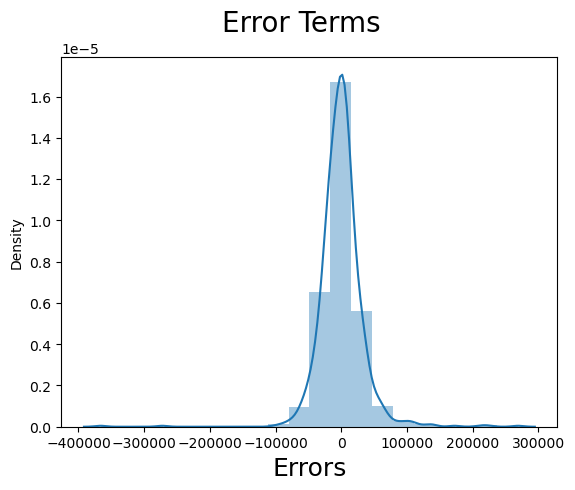

In [140]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

###### Evaluate R2 of Train model

In [143]:
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)


0.82

In [144]:
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1178635677396.5046
1154393415.667486
33976.365545294655


In [145]:
y_res = (y_train - y_train_cnst)


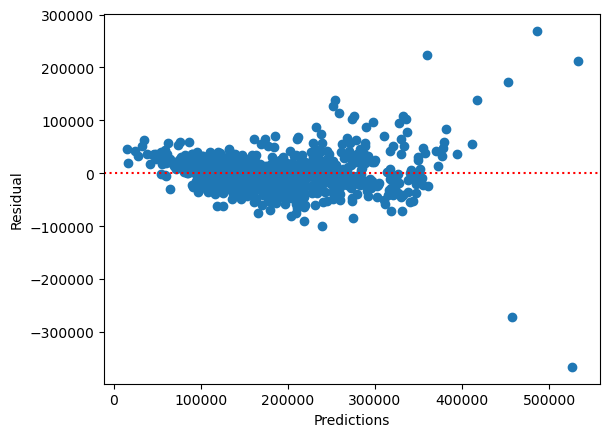

In [146]:
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


##### Prediction and Evalution on Test Data

In [147]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [148]:
df_test.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5.106640,7.556556,4.668571,7.459033,9.126179,21.324526,4.240389,2.078846,611657.000000,3.247562


In [149]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [150]:
X_train_new.columns


Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc'], dtype='object')

In [153]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [154]:
test_lm = sm.OLS(y_test.astype(float),X_test_new.astype(float)).fit()


In [155]:
test_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     95.47
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.01e-144
Time:                        15:41:51   Log-Likelihood:                -5194.2
No. Observations:                 439   AIC:                         1.043e+04
Df Residuals:                     417   BIC:                         1.052e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.693e+05   5414.026     31.264      0.000    1.59e+05     1.8e+05
OverallQual           3.062e+04   2866.947     10.681      0.000     2.5e+04    3.63e+04
BsmtUnfSF            -1.359e+04   1951.294     -6.963      0.000   -1.74e+04   -9751.869
TotalBsmtSF           2.005e+04   3913.900      5.124      0.000    1.24e+04    2.77e+04
1stFlrSF              1.971e+04   3489.937      5.647      0.000    1.28e+04    2.66e+04
2ndFlrSF              2.762e+04   3170.331      8.713      0.000    2.14e+04    3.39e+04
GarageCars            1.009e+04   2306.563      4.374      0.000    5554.421    1.46e+04
MSSubClass_120       -1.335e+04   8163.298     -1.636      0.103   -2.94e+04    2692.968
MSSubClass_160       -2.173e+04   1.17e+04     -1.857      0.064   -4.47e+04    1268.304
MSZoning_RL           5747.9292   4952.357      1.161      0.246   -3986.766    1.55e+04
Neighborhood_Blueste -1884.4491   3.61e+04     -0.052      0.958   -7.28e+04    6.91e+04
Neighborhood_BrDale   1.051e+04   2.06e+04      0.511      0.610   -2.99e+04    5.09e+04
Neighborhood_ClearCr  2155.8272   1.26e+04      0.171      0.864   -2.26e+04    2.69e+04
Neighborhood_Crawfor   1.54e+04   8320.200      1.851      0.065    -956.601    3.18e+04
Neighborhood_NoRidge  1.473e+04   1.52e+04      0.967      0.334   -1.52e+04    4.47e+04
Neighborhood_NridgHt  6.219e+04   9116.465      6.822      0.000    4.43e+04    8.01e+04
Neighborhood_Somerst  1.203e+04   8296.825      1.450      0.148   -4278.361    2.83e+04
Neighborhood_Veenker  1.395e-10   1.63e-10      0.858      0.392    -1.8e-10    4.59e-10
HouseStyle_1Story     1.173e+04   6254.174      1.876      0.061    -561.934     2.4e+04
Exterior1st_BrkComm  -4.281e-11    4.9e-11     -0.874      0.383   -1.39e-10    5.35e-11
Exterior1st_ImStucc  -2.219e-11   1.77e-11     -1.252      0.211    -5.7e-11    1.27e-11
Exterior1st_Stucco   -1696.6848   1.55e+04     -0.109      0.913   -3.22e+04    2.88e+04
Exterior2nd_Brk Cmn  -3291.5532   2.69e+04     -0.122      0.903   -5.61e+04    4.95e+04
Exterior2nd_BrkFace  -2043.9131   1.18e+04     -0.173      0.862   -2.52e+04    2.11e+04
Exterior2nd_ImStucc   3.289e+04   2.56e+04      1.282      0.200   -1.75e+04    8.33e+04
==============================================================================
Omnibus:                      180.452   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.564
Skew:                           1.485   Prob(JB):                         0.00
Kurtosis:                      12.365   Cond. No.                     2.93e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

In [156]:
y_pred = lm.predict(X_test_new)


### calculate r2 score of Test model

In [157]:
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.8

In [158]:
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

559623787358.0308
1274769447.284808
35703.91361300338


In [159]:
X_test_new = X_test_new.drop(['const'], axis=1)


In [161]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,HouseStyle_1Story,4.99
2,TotalBsmtSF,3.67
3,1stFlrSF,3.49
8,MSZoning_RL,3.12
4,2ndFlrSF,2.74
0,OverallQual,2.56
7,MSSubClass_160,2.01
21,Exterior2nd_Brk Cmn,1.89
18,Exterior1st_BrkComm,1.77
5,GarageCars,1.66


Text(0, 0.5, 'y_pred')

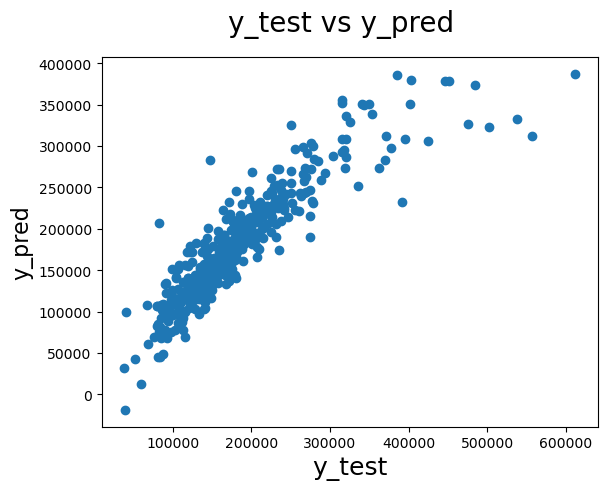

In [162]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [163]:
X_train_new.columns

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc'], dtype='object')

In [164]:
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

NameError: name 'house_data' is not defined

#### Final evalution

In [165]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8153146068387586
0.8019539199342763
1178635677396.5046
559623787358.0308
1154393415.667486
1274769447.284808


### Ridge Regression

In [166]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [167]:
print(model_cv.best_params_)


{'alpha': 10.0}


In [168]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 31503.73677916  -7926.89588725  11855.5785201   16939.30563315
  21951.27850481  11146.56283002 -10032.81888956 -21083.37315122
  11115.41309139    290.79445201   1522.5911354   17233.18171569
  17575.78875096  40115.46937901  38632.84594771  23705.6845088
  14115.26967512  13077.14335544  -4591.79390023  -5161.05051223
 -19345.55408405  -3550.32165832   8878.72244062   8382.83733643]


In [169]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8098984825876094
0.8086315985342394
1213200605170.9668
540754503059.9984
1188247409.5699968
1231787022.915714


## Lasso

In [170]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [171]:
print(model_cv.best_params_)


{'alpha': 100}


In [172]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=100)

In [173]:
lasso.coef_


array([ 30993.33407105,  -7939.1738774 ,  11256.56365929,  16784.61609333,
        21704.92132876,  10515.9223308 , -11149.44199195, -25494.32248491,
        10658.6338989 ,      0.        ,      0.        ,  22551.93848914,
        21830.78812505,  52630.1817491 ,  47552.31043242,  29295.98254808,
        20303.43998816,  13263.6231713 ,     -0.        ,     -0.        ,
       -23222.6014574 ,     -0.        ,   7860.34844855,   4406.89532849])

In [174]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8124576199660946
0.8063263651514101
1196868557649.439
547268458983.86694
1172251280.753613
1246625191.307214


In [175]:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.153146e-01,8.098985e-01,8.124576e-01
1,R2 Score (Test),8.019539e-01,8.086316e-01,8.063264e-01
2,RSS (Train),1.178636e+12,1.213201e+12,1.196869e+12
3,RSS (Test),5.596238e+11,5.407545e+11,5.472685e+11
4,MSE (Train),3.397637e+04,3.447096e+04,3.423816e+04
5,MSE (Test),3.570391e+04,3.509682e+04,3.530758e+04


### Lets observe the changes in the coefficients after regularization


In [176]:
betas = pd.DataFrame(index=X.columns)


In [177]:
betas.rows = X.columns


In [178]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [179]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,30597.930036,31503.736779,30993.334071
BsmtUnfSF,-7978.230645,-7926.895887,-7939.173877
TotalBsmtSF,10791.358495,11855.578520,11256.563659
1stFlrSF,16381.207639,16939.305633,16784.616093
2ndFlrSF,22116.012448,21951.278505,21704.921329
GarageCars,10544.215262,11146.562830,10515.922331
MSSubClass_120,-14768.216264,-10032.818890,-11149.441992
MSSubClass_160,-36025.629926,-21083.373151,-25494.322485
MSZoning_RL,10776.221284,11115.413091,10658.633899
Neighborhood_Blueste,19332.847408,290.794452,0.000000


## Que1: Double the values of Alpha for lasso & Ridge


In [180]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 31791.03048896  -7740.2837916   12344.4261006   17176.03565259
  21493.48563288  11613.59919536  -7708.91777383 -16104.03621221
  11005.20852036   -110.95902794   -754.72925264  12293.38919771
  13135.3461167   31363.38042074  31136.02694875  18269.60751382
   9076.35740092  11513.91385782  -2506.62898089  -2262.36444675
 -14647.71001676  -2971.15926387   6361.99961124   5508.3709468 ]
0.8047502470926562
0.8083815629438019


#### Coeff values are increasing as alpha will increase.r2_score of train data is also drop from .807 to 0.45



In [181]:
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 31201.27687739  -7851.30457254  11426.06196621  17236.36000897
  21178.4782348   10679.76517432  -7933.25703898 -21631.79865306
  10793.57035247      0.              0.          16420.53306749
  17012.53416073  48634.85501056  43082.23175941  25437.24932884
  10702.77755239  11700.53343313     -0.             -0.
 -18048.81979957     -0.           2001.1386692       0.        ]
0.8097954833341192
0.807916715375105


In [182]:
### Que3: Drop the Top 5 features and rebuild lasso


In [183]:
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [184]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)


In [185]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
print(model_cv.best_params_)


{'alpha': 50}


In [187]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=500)

In [188]:
lasso.coef_


array([ -3206.64635542,  24296.61308406,  21758.78703087,  28202.06900692,
         5997.02589092,     -0.        ,  16743.65654825,     -0.        ,
            0.        ,      0.        ,  12209.76812493,  28364.07044649,
       -38537.88900511,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,      0.        ,      0.        ])

In [189]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6269844658635925
0.665829798966049


#### After dropping the top 5 features model r2 score is very low i.e. 45% for Train and 44% for Test.



In [190]:
X_train_new.columns


Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'HouseStyle_1Story', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc'], dtype='object')